##### 선형회귀

In [27]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 전처리
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold

# 모형
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# 다항회귀
from sklearn.preprocessing import PolynomialFeatures

# 샘플데이터
from sklearn.datasets import fetch_california_housing

# 평가
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

##### 데이터 생성

In [28]:
np.random.seed(2022)
x = np.arange(50)
y = 2 * x + 10 * np.random.randn(50)

[k.shape for k in [x, y]]

[(50,), (50,)]

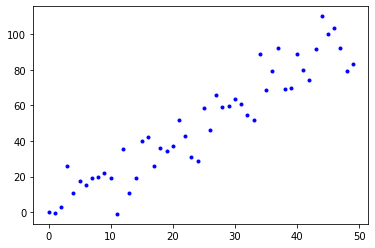

In [14]:
plt.plot(x, y, 'b.')
plt.show()


In [4]:
# 오차(Error)
# 추정된 a, b가 주어진 자료 x와 y를 얼마나 잘 설명하고 있는가?
# 손실(Loss), 비용(Cost)
# 추정된 값(Y_hat)과 실제값(Y)사이의 차이(오차, 잔차)는 작으면 작을수록 자료간의 관계를 잘 설명하고 있다고 판단

In [ ]:
# 오차에 대한 정의
# 1. LAD(Least Absolute Error) : 최소절대오차, L1 loss(L1 norm을 사용하기 때문), manhattan distance사용
# 2. LSE(Least Squared Error)  : 최소제곱오차. L2 loss(L2 norm을 사용하기 때문), euclidean distance사용

In [45]:
# 오차함수
def error(a, b):
    return np.sum(np.square(y - (a*x +b)))

# 기울기함수(편미분)
def grad_fa(a, b):
    return np.sum(-2 * x * (y-(a*x+b)))

# 기울기함수(편미분)
def grad_fb(a, b):
    return np.sum(-2 * (y-(a*x+b)))

In [48]:
beta0 = np.array([0, 0])

lr = 0.01
maxIter = 10
fval = []

for i in range(maxIter):
    fval.append(error(*beta0))
    grad = np.array([grad_fa(*beta0), grad_fb(*beta0)])
    beta1 = beta0 - lr * grad
    beta0 = beta1
    

In [49]:
print(fval)

[169495.56844014008, 107192103814.2964, 7.002390271285126e+16, 4.574354848719011e+22, 2.9882256588592716e+28, 1.9520769340326783e+34, 1.27520635701826e+40, 8.330364570316468e+45, 5.441862290950783e+51, 3.554930272703186e+57]


In [40]:
print(beta0)

[nan nan]


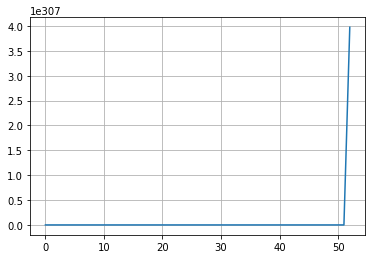

In [9]:
plt.plot(fval)
plt.grid()
plt.show()

In [12]:
beta0

array([-1.14285927e+291, -3.46431258e+289])

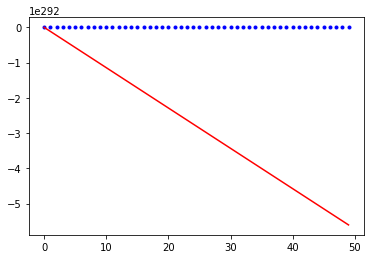

In [11]:
plt.plot(x, y, 'b.')
plt.plot(x, beta0[0]*x + beta0[1], 'r-')